In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torchvision import datasets, transforms
from scipy.stats import norm, chi2, uniform
from pqm import pqm_chi2, pqm_pvalue

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
# Set font to Computer 
# mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
plt.rc("text", usetex=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
test_data = datasets.MNIST(root='../data', train=False, download=True, transform=None)
train_data = datasets.MNIST(root='../data', train=True, download=True, transform=None)

In [3]:
test_data = test_data.data.reshape(-1, 28*28)/255
train_data = train_data.data.reshape(-1, 28*28)/255
all_data = torch.cat([test_data, train_data], dim=0).detach().numpy()
np.random.shuffle(all_data)
x_samples = torch.tensor(all_data[:35000], device = device)
y_samples = torch.tensor(all_data[35000:], device = device)

In [4]:
zs = []
num_repeats = 35
n = len(x_samples) // num_repeats

for i in range(num_repeats):
    z = pqm_chi2(x_samples[i*n:(i+1)*n], y_samples[i*n:(i+1)*n], re_tessellation=num_repeats)
    zs += z

print(np.median(zs), np.std(zs))

97.46543125061235 13.081549992867044


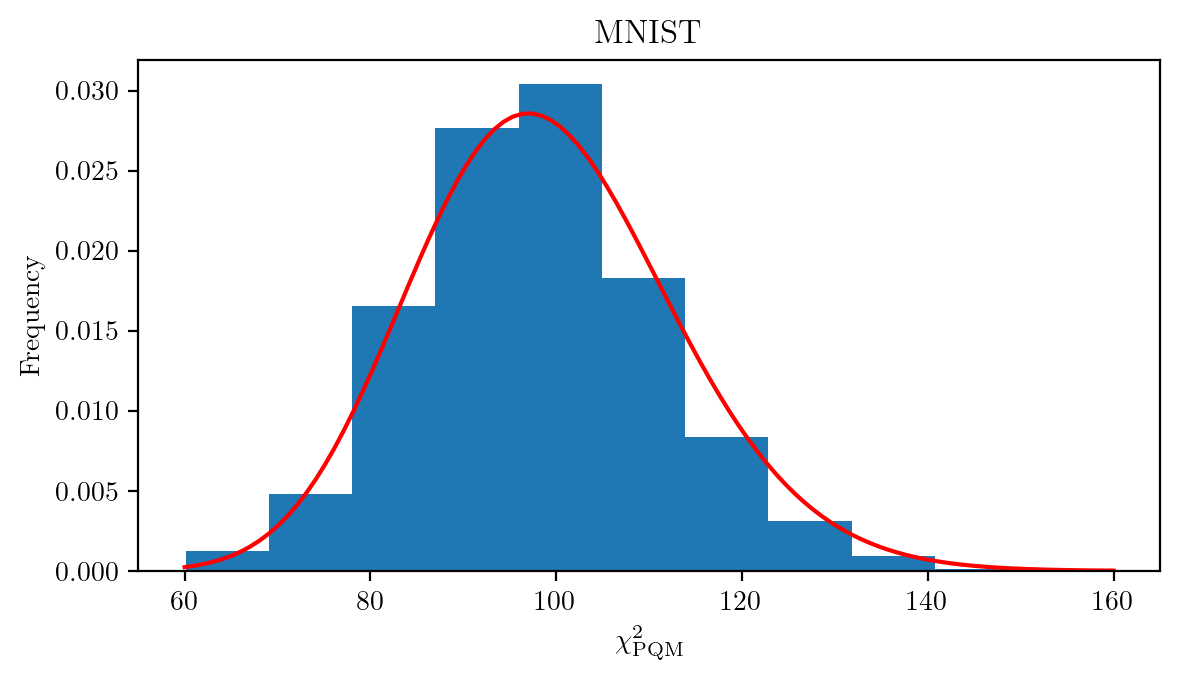

In [5]:
fig, ax = plt.subplots(figsize=(6, 3.5))
ax.hist(zs, bins=10, density=True)
ax.plot(np.linspace(60, 160, 100), chi2.pdf(np.linspace(60, 160, 100), df=99), color='red')
ax.set_xlabel(r'$\chi^2_{{\rm PQM}}$')
ax.set_ylabel('Frequency')
plt.title('MNIST')
plt.tight_layout()
plt.show()

In [6]:
p_val = []
num_repeats = 35
n = len(x_samples) // num_repeats

for i in range(num_repeats):
    pval = pqm_pvalue(x_samples[i*n:(i+1)*n], y_samples[i*n:(i+1)*n], re_tessellation=num_repeats)
    p_val += pval

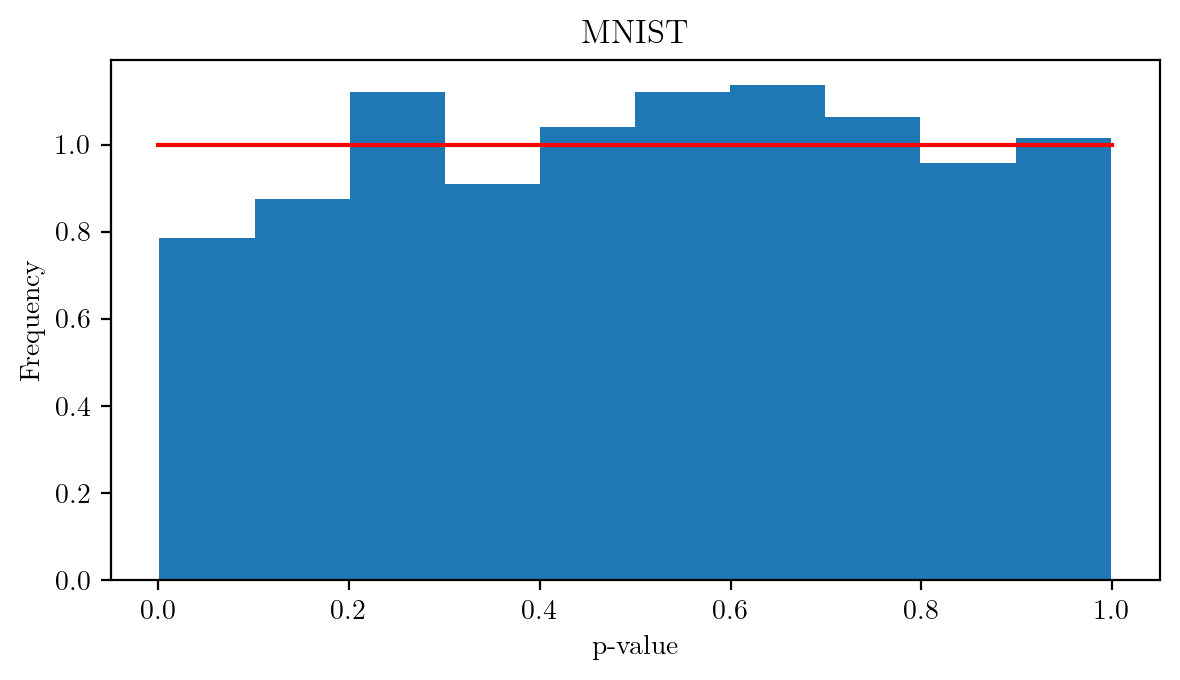

In [7]:
fig, ax = plt.subplots(figsize=(6, 3.5))
ax.hist(p_val, bins=10, density=True)
# ax.plot(np.linspace(60, 160, 100), chi2.pdf(np.linspace(60, 160, 100), df=99), color='red')
ax.plot(np.linspace(0, 1, 100), uniform.pdf(np.linspace(0, 1, 100), loc=0, scale=1-0), color='red')

ax.set_xlabel('p-value')
ax.set_ylabel('Frequency')
plt.title('MNIST')
plt.tight_layout()
plt.show()